In [219]:
import pandas as pd
import numpy as np
import os

tweet_folder = './CashTag'
ticker_path = './ticker.csv'

In [220]:
import re
def remove_link(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [221]:
tt = {'ticker':[], '#tweets':[]}
f = []
"""#data = pd.DataFrame(columns = ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'ticker'])"""
for folder in os.listdir(tweet_folder):
    #folder = 'AMZN'
    if(folder[0] == '.') or folder in forbbidden:
        continue
    path = os.path.join(os.path.join(tweet_folder, folder), 'tweets.csv')
    cur = pd.read_csv(path)
    cur['ticker'] = folder
    #print(cur.columns)
    #break
    #tt['ticker'].append(folder)
    #tt['#tweets'].append(len(cur['username']))
    f.append(cur)
    #data.append(cur)
    #break
data = pd.concat(f, ignore_index=True)

In [222]:
data = data[np.isin(data['username'], bogus_users, invert = True)]

In [223]:
print(len(data['tweet']))

166678


In [224]:
data.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'ticker'],
      dtype='object')

In [225]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,ticker
0,1207319172260122625,1207319172260122625,2019-12-18 20:48:16 IST,2019-12-18,20:48:16,530,21328656,ibdinvestors,Investors.com,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,CTAS
1,1151590774317957120,1151590774317957120,2019-07-18 02:03:30 IST,2019-07-18,02:03:30,530,21460063,davidgfool,David Gardner,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,CTAS
2,1034898533818814469,1034898533818814469,2018-08-30 01:50:12 IST,2018-08-30,01:50:12,530,15568127,themotleyfool,The Motley Fool,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,CTAS
3,1032272087287832576,1032272087287832576,2018-08-22 19:53:38 IST,2018-08-22,19:53:38,530,18639734,nasdaq,Nasdaq,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,CTAS
4,1032256872642957312,1032256872642957312,2018-08-22 18:53:11 IST,2018-08-22,18:53:11,530,18639734,nasdaq,Nasdaq,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,CTAS


In [226]:
data.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.666780e+05,1.666780e+05,166678.0,1.666780e+05,166678.000000,166678.000000,166678.000000,166678.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.840519e+17,9.838747e+17,530.0,2.779184e+16,7.224529,30.885612,110.648232,0.412286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.663914e+17,1.664718e+17,0.0,1.535515e+17,86.426341,421.806870,1438.880769,0.492248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.535723e+17,1.535723e+17,530.0,1.200000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.007129e+17,9.003775e+17,530.0,1.528139e+07,0.000000,2.000000,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.014878e+18,1.014673e+18,530.0,3.938452e+07,2.000000,6.000000,16.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.108437e+18,1.108415e+18,530.0,3.161552e+08,4.000000,14.000000,37.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.212161e+18,1.212161e+18,530.0,1.191806e+18,14457.000000,135846.000000,466408.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

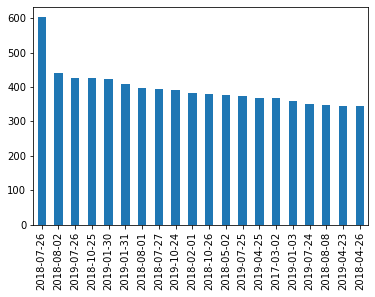

In [227]:
ts = pd.Series(data['date'].values, index = data['date'])
data['date'].value_counts().sort_values()
tr = data['date'].value_counts()
tr.head(20).plot.bar()

<AxesSubplot:>

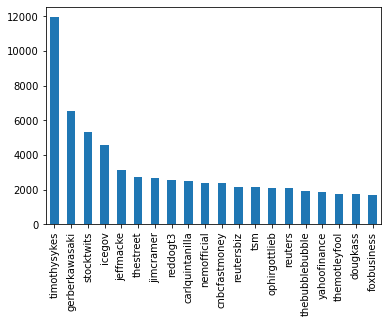

In [228]:
ts = data['username'].value_counts()
ts.head(20).plot.bar()

<AxesSubplot:xlabel='username'>

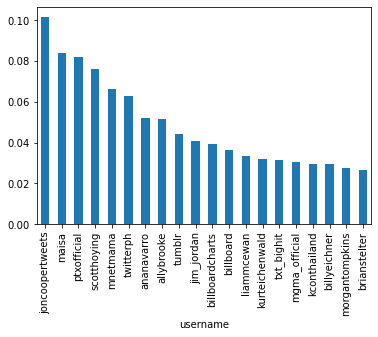

In [275]:
tt = data.groupby(['username']).agg([
    'mean', 'count', 'sum'
])['retweets_count']['mean'].nlargest(20)
tt.plot.bar()

<AxesSubplot:>

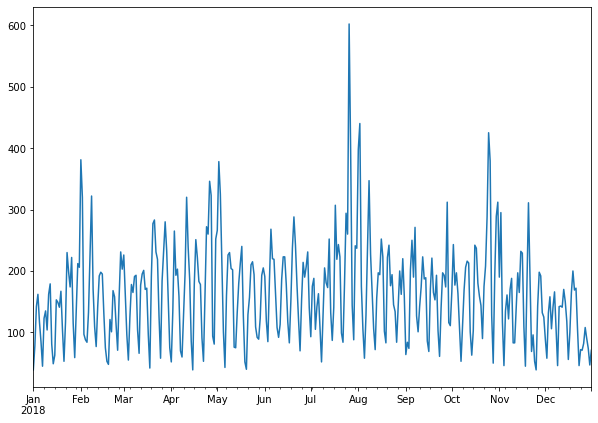

In [258]:
tt = data['date'].value_counts().sort_index()
tt.index = pd.to_datetime(tt.index,format='%Y-%m-%d')
tt = tt[tt.index.year == 2018]
tt.groupby(by = [tt.index.month, tt.index.year])
tt.plot.line(figsize = (10, 7))

In [255]:
import nltk
import re

VOCAB_PATH = "./"

if os.path.exists(
    os.path.join(VOCAB_PATH, "LoughranMcDonald_MasterDictionary_2018.csv")
):
    loughran_mcdonald = pd.read_csv(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_MasterDictionary_2018.csv")
    )
    loughran_mcdonald_sentiment = pd.read_excel(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_SentimentWordLists_2018.xlsx"),
        sheet_name=None,
        header=None,
    )
else:
    VOCAB_PATH = "./"
    loughran_mcdonald = pd.read_csv(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_MasterDictionary_2018.csv")
    )
    loughran_mcdonald_sentiment = pd.read_excel(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_SentimentWordLists_2018.xlsx"),
        sheet_name=None,
        header=None,
    )

sentiment_dict = {
    x.lower(): set(loughran_mcdonald_sentiment[x][0].str.lower())
    for x in [
        "Negative",
        "Positive",
        "Uncertainty",
        "Litigious",
        "StrongModal",
        "WeakModal",
        "Constraining",
    ]
}
vocab = set(loughran_mcdonald["Word"].str.lower())

dollar_pattern = re.compile(r"\$\d+(?:,\d+)?(?:\.\d+)?")
percent_pattern = re.compile(r"\d+(?:,\d+)?(?:\.\d+)?%")
all_num_pattern = re.compile(r"\$?\d+(?:,\d+)?(?:\.\d+)?%?(?!-\w+)(?!\w+)")
form_pattern = re.compile(r"\d+\w+-\d+|\d+-[A-Za-z]")


stop_word_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
 "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',
 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
 "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
 "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
 "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
 'wouldn', "wouldn't"]
STOPWORDS = set(stop_word_list)

def compute_score(sent):
    sent_lower = sent.lower()
    tokens = [x for x in _tokenize(sent_lower) if x not in STOPWORDS]
    pos, valid, neg = 0, 0, 0

    for tok in tokens:
        if tok in vocab:
            valid += 1
        if tok in sentiment_dict["positive"]:
            pos += 1
        if tok in sentiment_dict["negative"]:
            neg += 1

    return valid, pos, neg

def _tokenize(sent):
    if re.search(r"turn the call .*? to", sent) is not None:
        return ""
    pattern = r"""(?x)
        (?:[A-Z]\.)+
      | \$?\d+(?:\.\d+)?%?
      | \d+(?:\.\d+)?
      | \w+(?:-\w+)*
      | \.\.\.
      | \'s
    """
    return nltk.regexp_tokenize(sent, pattern)

def tokenize(sent):
    return " . ".join([" ".join(_tokenize(prune_sentence(x))) for x in sent.split("|")])

def prune_sentence(sent):
    s = re.sub(r"Thank.*?[\.!?]", "", sent)
    s = re.sub(r"Welcome.*?[\.!?]", "", s)
    s = re.sub(r"Good (morning|afternoon|evening).*?[\.!?]", "", s, flags=re.IGNORECASE)
    #     s = re.sub(r'[A-Z].?turn the call (?:back|over) to.?[\.!?]', '', s)
    s = re.sub(r"\([^)]*\)", "", s).strip()
    return s

In [231]:
#normalize like, retweets, replies
e_c = ['likes_count', 'retweets_count', 'replies_count']
for column in e_c:
    data[column] = data[column] / data[column].abs().max()

In [232]:
#Space for cal pos/neg features

data['lm_val'] = 0
data['lm_pos'] = 0
data['lm_neg'] = 0

In [233]:
data.shape

(166678, 40)

In [234]:
for i, tweet in enumerate(data['tweet']):
    tweet = remove_link(prune_sentence(tweet))
    score = compute_score(tweet)
    data.at[i, 'lm_val'] = score[0]
    data.at[i, 'lm_pos'] = score[1]
    data.at[i, 'lm_neg'] = score[2]
    #print(score)
    #print(data.loc[[0]])
    #break

In [235]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,ticker,lm_val,lm_pos,lm_neg
0,1.207319e+18,1.207319e+18,2019-12-18 20:48:16 IST,2019-12-18,20:48:16,530.0,21328656.0,ibdinvestors,Investors.com,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,15.0,2.0,0.0
1,1.151591e+18,1.151591e+18,2019-07-18 02:03:30 IST,2019-07-18,02:03:30,530.0,21460063.0,davidgfool,David Gardner,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,10.0,1.0,0.0
2,1.034899e+18,1.034899e+18,2018-08-30 01:50:12 IST,2018-08-30,01:50:12,530.0,15568127.0,themotleyfool,The Motley Fool,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,17.0,0.0,1.0
3,1.032272e+18,1.032272e+18,2018-08-22 19:53:38 IST,2018-08-22,19:53:38,530.0,18639734.0,nasdaq,Nasdaq,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,4.0,0.0,0.0
4,1.032257e+18,1.032257e+18,2018-08-22 18:53:11 IST,2018-08-22,18:53:11,530.0,18639734.0,nasdaq,Nasdaq,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,8.0,0.0,0.0


In [236]:
s_c = ['lm_val', 'lm_pos', 'lm_neg']

for column in s_c:
    data[column] = data[column] * data['likes_count']

In [237]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,ticker,lm_val,lm_pos,lm_neg
0,1.207319e+18,1.207319e+18,2019-12-18 20:48:16 IST,2019-12-18,20:48:16,530.0,21328656.0,ibdinvestors,Investors.com,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,0.000289,0.000039,0.000000
1,1.151591e+18,1.151591e+18,2019-07-18 02:03:30 IST,2019-07-18,02:03:30,530.0,21460063.0,davidgfool,David Gardner,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,0.000214,0.000021,0.000000
2,1.034899e+18,1.034899e+18,2018-08-30 01:50:12 IST,2018-08-30,01:50:12,530.0,15568127.0,themotleyfool,The Motley Fool,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,0.000620,0.000000,0.000036
3,1.032272e+18,1.032272e+18,2018-08-22 19:53:38 IST,2018-08-22,19:53:38,530.0,18639734.0,nasdaq,Nasdaq,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,0.000094,0.000000,0.000000
4,1.032257e+18,1.032257e+18,2018-08-22 18:53:11 IST,2018-08-22,18:53:11,530.0,18639734.0,nasdaq,Nasdaq,NaN,...,NaN,[],NaN,NaN,NaN,NaN,CTAS,0.000309,0.000000,0.000000


<AxesSubplot:xlabel='ticker'>

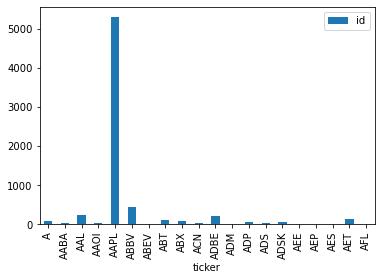

In [691]:
temp = data.groupby(['ticker']).agg('count')
#temp.reset_index()
rem = ['ICE', 'TSM', 'UPS']
for col in rem:
    temp = temp[temp.index != col]
temp.head(20).plot.bar(y = 'id', figsize = (6, 4))

In [ ]:
#Aggregation begings

In [461]:
merge_col = ['ticker', 'date']
tca = data[merge_col].value_counts()
dtca = tca.to_frame()
dtca.rename(columns = {0:'#Tweets'})

#Tweets
ticker date               
SNAP   2017-03-02      289
FB     2018-07-26      255
BABA   2014-09-19      226
AAPL   2019-01-03      184
       2018-08-01      180
...                    ...
MCD    2018-07-28        1
       2018-07-27        1
       2018-07-21        1
       2018-07-19        1
A      2012-05-30        1

[54283 rows x 1 columns]

In [462]:
tcu = data.groupby(merge_col)['username'].nunique().sort_values(ascending = False)
dtcu = tcu.to_frame()
dtcu.rename(columns = {0:'#TotalUsers'})

username
ticker date                
CAT    2019-05-17       158
SNAP   2017-03-02       121
FB     2018-07-26        99
BABA   2014-09-19        96
SNAP   2017-05-11        90
...                     ...
MO     2019-04-22         1
       2019-04-19         1
       2019-04-03         1
       2019-04-01         1
A      2012-05-30         1

[54283 rows x 1 columns]

In [463]:
f_data = pd.merge(dtca, dtcu, on = merge_col)
#f_data.rename(columns = {0:"#Tweets"})

In [464]:
tcsv = data.groupby(merge_col)['lm_val'].agg(['sum'])
tcsv.head()

#dtcsv = tcsv.to_frame()
tcsv.rename(index = str, columns = {'sum':'#V_T'})
f_data = pd.merge(f_data, tcsv, on = merge_col)

In [465]:
tcsp = data.groupby(merge_col)['lm_pos'].agg(['sum'])
tcsp.rename(index = str, columns = {'sum': '#P_T'})
f_data = pd.merge(f_data, tcsp, on = merge_col)

In [466]:
tcsn = data.groupby(merge_col)['lm_neg'].agg(['sum'])
tcsn.rename(index = str, columns = {'sum': '#N_T'})
f_data = pd.merge(f_data, tcsn, on = merge_col)

In [467]:
f_data = f_data.rename(columns = {0:'#Tweets', 'username':'#Users', 'sum_x': '#V_T', 'sum_y':'#P_T', 'sum':'N_T'})

In [468]:
tlc = data.groupby(merge_col)['likes_count'].agg(['sum', 'mean'])
tlc = tlc.rename(columns = {0:'sum_likes', 1:'mean_likes'})
f_data = pd.merge(f_data, tlc, on = merge_col)


In [469]:
trc = data.groupby(merge_col)['retweets_count'].agg(['sum', 'mean'])
trc = trc.rename(columns = {0:'total_retweets', 1:'mean_retweets'})
f_data = pd.merge(f_data, trc, on = merge_col)

In [470]:
trsc = data.groupby(merge_col)['replies_count'].agg(['sum', 'mean'])
trsc = trsc.rename(columns = {0:'total_replies', 1:'mean_replies'})
f_data = pd.merge(f_data, trsc, on = merge_col)

In [471]:
f_data = f_data.rename(columns = {'sum_x':'total_likes', 'mean_x':'mean_likes', 'sum_y': 'total_retweets', 
                                  'mean_y': 'mean_retweet', 'sum': 'total_replies', 'mean': 'mean_replies'
                                 })

In [472]:
f_data.head()

#Tweets  #Users      #V_T      #P_T       N_T  total_likes  \
ticker date                                                                     
SNAP   2017-03-02      289     121  0.154371  0.003486  0.005662     0.016097   
FB     2018-07-26      255      99  0.174169  0.006258  0.003791     0.019607   
BABA   2014-09-19      226      96  0.087291  0.001765  0.002954     0.009211   
AAPL   2019-01-03      184      85  0.219812  0.002584  0.016634     0.021070   
       2018-08-01      180      67  0.113701  0.002438  0.000950     0.013821   

                   mean_likes  total_retweets  mean_retweet  total_replies  \
ticker date                                                                  
SNAP   2017-03-02    0.000056        0.035754      0.000124       0.046275   
FB     2018-07-26    0.000077        0.027200      0.000107       0.093035   
BABA   2014-09-19    0.000041        0.057337      0.000254       0.057204   
AAPL   2019-01-03    0.000115        0.021716      0.000118       0.107491   
       2018-08-01    0.000077        0.018992      0.000106       0.036522   

                   mean_replies  
ticker date                      
SNAP   2017-03-02      0.000160  
FB     2018-07-26      0.000365  
BABA   2014-09-19      0.000253  
AAPL   2019-01-03      0.000584  
       2018-08-01      0.000203

In [473]:
f_data = f_data.reset_index()

In [475]:
#f_data = f_data.reset_index()

f_data.head()

,ticker,date,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies
0,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.000160
1,FB,2018-07-26,255,99,0.174169,0.006258,0.003791,0.019607,0.000077,0.027200,0.000107,0.093035,0.000365
2,BABA,2014-09-19,226,96,0.087291,0.001765,0.002954,0.009211,0.000041,0.057337,0.000254,0.057204,0.000253
3,AAPL,2019-01-03,184,85,0.219812,0.002584,0.016634,0.021070,0.000115,0.021716,0.000118,0.107491,0.000584
4,AAPL,2018-08-01,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203


In [476]:
f_data.keys()

Index(['ticker', 'date', '#Tweets', '#Users', '#V_T', '#P_T', 'N_T',
       'total_likes', 'mean_likes', 'total_retweets', 'mean_retweet',
       'total_replies', 'mean_replies'],
      dtype='object')

In [480]:
"""f_data['%Tweets_day'] = 0
dic_date = {}
for i in range(len(f_data['date'])):
    key = f_data['date'][i]
    if key in dic_date:
        dic_date[key] += f_data['#Tweets'][i]
    else:
        dic_date[key] = f_data['#Tweets'][i]
for i in range(len(f_data['date'])):
    #print(f_data['#Tweets'][i] / dic_date[f_data['date'][i]])
    f_data.iat[i, 13] =  f_data['#Tweets'][i] / dic_date[f_data['date'][i]]
f_data.head()"""

,ticker,date,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day
0,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.000160,0
1,FB,2018-07-26,255,99,0.174169,0.006258,0.003791,0.019607,0.000077,0.027200,0.000107,0.093035,0.000365,0
2,BABA,2014-09-19,226,96,0.087291,0.001765,0.002954,0.009211,0.000041,0.057337,0.000254,0.057204,0.000253,0
3,AAPL,2019-01-03,184,85,0.219812,0.002584,0.016634,0.021070,0.000115,0.021716,0.000118,0.107491,0.000584,0
4,AAPL,2018-08-01,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203,0


In [482]:
fm = f_data.groupby(['date'])['#Tweets'].agg('sum').sort_values(ascending = False)
f_data = pd.merge(f_data, fm, how = 'left', on = ['date'])
f_data['%Tweets_day'] = f_data['#Tweets_x']/f_data['#Tweets_y']
f_data = f_data.rename(columns = {'#Tweets_x':'#Tweets', '#Tweets_y':'#Tweets_today'})
f_data.head()

,ticker,date,#Tweets_x,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,#Tweets_y
0,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.000160,0,367
1,FB,2018-07-26,255,99,0.174169,0.006258,0.003791,0.019607,0.000077,0.027200,0.000107,0.093035,0.000365,0,602
2,BABA,2014-09-19,226,96,0.087291,0.001765,0.002954,0.009211,0.000041,0.057337,0.000254,0.057204,0.000253,0,243
3,AAPL,2019-01-03,184,85,0.219812,0.002584,0.016634,0.021070,0.000115,0.021716,0.000118,0.107491,0.000584,0,360
4,AAPL,2018-08-01,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203,0,398


In [484]:
fm = f_data.groupby(['date'])['#Tweets'].agg('sum').sort_values(ascending = False)
f_data = pd.merge(f_data, fm, how = 'left', on = ['date'])
f_data['%Tweets_day'] = f_data['#Tweets_x']/f_data['#Tweets_y']
f_data = f_data.rename(columns = {'#Tweets_x':'#Tweets', '#Tweets_y':'#Tweets_today'})
f_data.head()

,ticker,date,#Tweets_x,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,#Tweets_y
0,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.000160,0.787466,367
1,FB,2018-07-26,255,99,0.174169,0.006258,0.003791,0.019607,0.000077,0.027200,0.000107,0.093035,0.000365,0.423588,602
2,BABA,2014-09-19,226,96,0.087291,0.001765,0.002954,0.009211,0.000041,0.057337,0.000254,0.057204,0.000253,0.930041,243
3,AAPL,2019-01-03,184,85,0.219812,0.002584,0.016634,0.021070,0.000115,0.021716,0.000118,0.107491,0.000584,0.511111,360
4,AAPL,2018-08-01,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203,0.452261,398


In [506]:
f_data['date'] = pd.to_datetime(f_data['date'] ,format='%Y-%m-%d')

In [520]:
f_data.to_csv('tweet_features.csv', index = False)

In [513]:
from datetime import datetime, timedelta
dw = pd.DataFrame(columns = ['date', '#Tweets_week', '#Tweets_month'])
dw['date'] = f_data['date']
ttw = []
ttm = []
for ind, i in enumerate(dw['date']):
    e = i
    sw = e - timedelta(days = 7)
    sm = e - timedelta(days = 30)
    tw = f_data[(f_data['date'] >= sw) & (f_data['date'] <= e)]['#Tweets'].sum()
    tm = f_data[(f_data['date'] >= sm) & (f_data['date'] <= e)]['#Tweets'].sum()
    #print(tw, tm)
    #break
    dw.iat[ind, 1] = tw
    dw.iat[ind, 2] = tm
    #print(dw['date'][ind])
    #break
dw.head()

,date,#Tweets_week,#Tweets_month
0,2017-03-02,842,2448
1,2018-07-26,1984,5816
2,2014-09-19,342,592
3,2019-01-03,911,3737
4,2018-08-01,2365,6244


In [514]:
af_data = f_data.copy()

In [519]:
af_data = pd.merge(af_data, dw, how = 'left', on = ['date'])
af_data.head()

,ticker,date,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,#Tweets_today,#Tweets_week,#Tweets_month
0,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.00016,0.787466,367,842,2448
1,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.00016,0.787466,367,842,2448
2,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.00016,0.787466,367,842,2448
3,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.00016,0.787466,367,842,2448
4,SNAP,2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.00016,0.787466,367,842,2448


In [ ]:
from datetime import datetime, timedelta
tdw = pd.DataFrame(columns = ['date', 'ticker', '#Ticker_tweets_week', '#Ticker_tweets_month'])
tdw['date'] = f_data['date']
ttw = []
ttm = []
for ind, i in enumerate(dw['date']):
    e = i
    sw = e - timedelta(days = 7)
    sm = e - timedelta(days = 30)
    tw = f_data[(f_data['date'] >= sw) & (f_data['date'] <= e)]['#Tweets'].sum()
    tm = f_data[(f_data['date'] >= sm) & (f_data['date'] <= e)]['#Tweets'].sum()
    #print(tw, tm)
    #break
    dw.iat[ind, 1] = tw
    dw.iat[ind, 2] = tm
    #print(dw['date'][ind])
    #break
dw.head()

In [385]:

f_data.head()

,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,Total_tweets_today
date,,,,,,,,,,,,,
2017-03-02,289,121,0.154371,0.003486,0.005662,0.016097,0.000056,0.035754,0.000124,0.046275,0.000160,0.787466,367
2018-07-26,255,99,0.174169,0.006258,0.003791,0.019607,0.000077,0.027200,0.000107,0.093035,0.000365,0.423588,602
2014-09-19,226,96,0.087291,0.001765,0.002954,0.009211,0.000041,0.057337,0.000254,0.057204,0.000253,0.930041,243
2019-01-03,184,85,0.219812,0.002584,0.016634,0.021070,0.000115,0.021716,0.000118,0.107491,0.000584,0.511111,360
2018-08-01,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203,0.452261,398


In [596]:
f_data.keys()

Index(['ticker', 'date', '#Tweets', '#Users', '#V_T', '#P_T', 'N_T',
       'total_likes', 'mean_likes', 'total_retweets', 'mean_retweet',
       'total_replies', 'mean_replies', '%Tweets_day', '#Tweets_today'],
      dtype='object')

In [667]:
t_stock.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF,Open,High,Low,...,Adj Close,Volume,Name,RSI_14D,BB_MIDDLE_BAND,BB_UPPER_BAND,BB_LOWER_BAND,Aroon_oscillator,PVT,Momentum
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,0,1.50,-0.12,0.94,-0.74,-0.22,0.0,14.621429,14.732143,14.607143,...,12.650659,302220800,AAPL,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000
2012-01-04,1,0.00,-0.61,0.03,0.30,-0.06,0.0,14.642857,14.810000,14.617143,...,12.718646,260022000,AAPL,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000
2012-01-05,2,0.39,0.18,0.19,-0.42,0.05,0.0,14.819643,14.948214,14.738214,...,12.859850,271269600,AAPL,0.0,0.0,0.0,0.0,0.0,1.614256e+06,0.000
2012-01-06,3,-0.19,-0.04,-0.26,-0.04,-0.03,0.0,14.991786,15.098214,14.972143,...,12.994284,318292800,AAPL,0.0,0.0,0.0,0.0,0.0,3.157371e+05,0.000
2012-01-09,4,0.28,0.27,-0.05,-0.20,0.24,0.0,15.196429,15.276786,15.048214,...,12.973674,394024400,AAPL,0.0,0.0,0.0,0.0,0.0,-3.952366e+06,0.375


In [285]:
dta.head()

id  conversation_id  timezone       user_id  \
ticker date                                                                
A      2012-05-30  2.078120e+17     2.078120e+17     530.0  9.289610e+05   
       2013-10-16  3.902300e+17     3.902300e+17     530.0  2.505624e+07   
       2014-03-06  4.413739e+17     4.413739e+17     530.0  3.759802e+08   
       2014-06-14  4.777648e+17     4.777648e+17     530.0  2.609791e+08   
       2014-06-19  4.793771e+17     4.793771e+17     530.0  1.596790e+09   

                   replies_count  retweets_count  likes_count  video  near  \
ticker date                                                                  
A      2012-05-30       0.001383        0.000162     0.000017    0.0   NaN   
       2013-10-16       0.000069        0.000066     0.000009    0.0   NaN   
       2014-03-06       0.000069        0.000015     0.000017    0.0   NaN   
       2014-06-14       0.005741        0.002341     0.001940    0.0   NaN   
       2014-06-19       0.000069        0.000029     0.000051    1.0   NaN   

                   geo  ...  user_rt_id  user_rt  retweet_id  retweet_date  \
ticker date             ...                                                  
A      2012-05-30  NaN  ...         NaN      NaN         NaN           NaN   
       2013-10-16  NaN  ...         NaN      NaN         NaN           NaN   
       2014-03-06  NaN  ...         NaN      NaN         NaN           NaN   
       2014-06-14  NaN  ...         NaN      NaN         NaN           NaN   
       2014-06-19  NaN  ...         NaN      NaN         NaN           NaN   

                   translate  trans_src  trans_dest    lm_val    lm_pos  \
ticker date                                                               
A      2012-05-30        NaN        NaN         NaN  0.000120  0.000017   
       2013-10-16        NaN        NaN         NaN  0.000000  0.000000   
       2014-03-06        NaN        NaN         NaN  0.000206  0.000000   
       2014-06-14        NaN        NaN         NaN  0.017463  0.000000   
       2014-06-19        NaN        NaN         NaN  0.000617  0.000000   

                     lm_neg  
ticker date                  
A      2012-05-30  0.000000  
       2013-10-16  0.000000  
       2014-03-06  0.000000  
       2014-06-14  0.000000  
       2014-06-19  0.000051  

[5 rows x 21 columns]

In [657]:
sat = f_data[f_data['ticker'] == 'AAPL']
sat['date'] = pd.to_datetime(sat['date'], '%Y-%m-%d')
sat.head()

<ipython-input-657-7a42903063ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat['date'] = pd.to_datetime(sat['date'], '%Y-%m-%d')


,ticker,date,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,#Tweets_today
3,AAPL,2019-01-03,184,85,0.219812,0.002584,0.016634,0.021070,0.000115,0.021716,0.000118,0.107491,0.000584,0.511111,360
4,AAPL,2018-08-01,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203,0.452261,398
10,AAPL,2019-01-30,150,62,0.093019,0.001522,0.002120,0.012384,0.000083,0.013582,0.000091,0.040949,0.000273,0.355450,422
13,AAPL,2018-11-02,130,54,0.074002,0.001226,0.002862,0.007639,0.000059,0.008458,0.000065,0.036176,0.000278,0.440678,295
14,AAPL,2018-08-02,124,78,0.111977,0.000783,0.002959,0.014496,0.000117,0.020450,0.000165,0.032026,0.000258,0.281818,440


In [658]:
sat = sat.set_index('date')
sat.head()

,ticker,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,#Tweets_today
date,,,,,,,,,,,,,,
2019-01-03,AAPL,184,85,0.219812,0.002584,0.016634,0.021070,0.000115,0.021716,0.000118,0.107491,0.000584,0.511111,360
2018-08-01,AAPL,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203,0.452261,398
2019-01-30,AAPL,150,62,0.093019,0.001522,0.002120,0.012384,0.000083,0.013582,0.000091,0.040949,0.000273,0.355450,422
2018-11-02,AAPL,130,54,0.074002,0.001226,0.002862,0.007639,0.000059,0.008458,0.000065,0.036176,0.000278,0.440678,295
2018-08-02,AAPL,124,78,0.111977,0.000783,0.002959,0.014496,0.000117,0.020450,0.000165,0.032026,0.000258,0.281818,440


In [659]:
cat = sat[sat.index.year == 2018]
cat.head()


,ticker,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,#Tweets_today
date,,,,,,,,,,,,,,
2018-08-01,AAPL,180,67,0.113701,0.002438,0.000950,0.013821,0.000077,0.018992,0.000106,0.036522,0.000203,0.452261,398
2018-11-02,AAPL,130,54,0.074002,0.001226,0.002862,0.007639,0.000059,0.008458,0.000065,0.036176,0.000278,0.440678,295
2018-08-02,AAPL,124,78,0.111977,0.000783,0.002959,0.014496,0.000117,0.020450,0.000165,0.032026,0.000258,0.281818,440
2018-05-02,AAPL,101,48,0.068194,0.001357,0.002065,0.006734,0.000067,0.010887,0.000108,0.021028,0.000208,0.267196,378
2018-09-12,AAPL,53,30,0.020130,0.000920,0.000744,0.002123,0.000040,0.002429,0.000046,0.008231,0.000155,0.237668,223


In [660]:
cat['sent'] = (cat['#P_T'] - cat['N_T']) / (cat['#P_T'] + cat['N_T'])

<ipython-input-660-b10839362887>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['sent'] = (cat['#P_T'] - cat['N_T']) / (cat['#P_T'] + cat['N_T'])


In [661]:
cat = cat.sort_index()
cat.head()

,ticker,#Tweets,#Users,#V_T,#P_T,N_T,total_likes,mean_likes,total_retweets,mean_retweet,total_replies,mean_replies,%Tweets_day,#Tweets_today,sent
date,,,,,,,,,,,,,,,
2018-02-22,AAPL,4,4,0.002393,0.000000,0.000000,0.000232,0.000058,0.000685,0.000171,0.000553,0.000138,0.023810,168,NaN
2018-02-23,AAPL,6,6,0.002674,0.000013,0.000032,0.000270,0.000045,0.000434,0.000072,0.001038,0.000173,0.037975,158,-0.428571
2018-02-24,AAPL,5,4,0.006059,0.000064,0.000047,0.000710,0.000142,0.001274,0.000255,0.001868,0.000374,0.044643,112,0.153846
2018-02-26,AAPL,13,11,0.005435,0.000126,0.000092,0.000560,0.000043,0.000604,0.000046,0.001107,0.000085,0.081250,160,0.156863
2018-02-27,AAPL,7,7,0.002963,0.000045,0.000062,0.000309,0.000044,0.000626,0.000089,0.000623,0.000089,0.030303,231,-0.160000


<AxesSubplot:xlabel='date'>

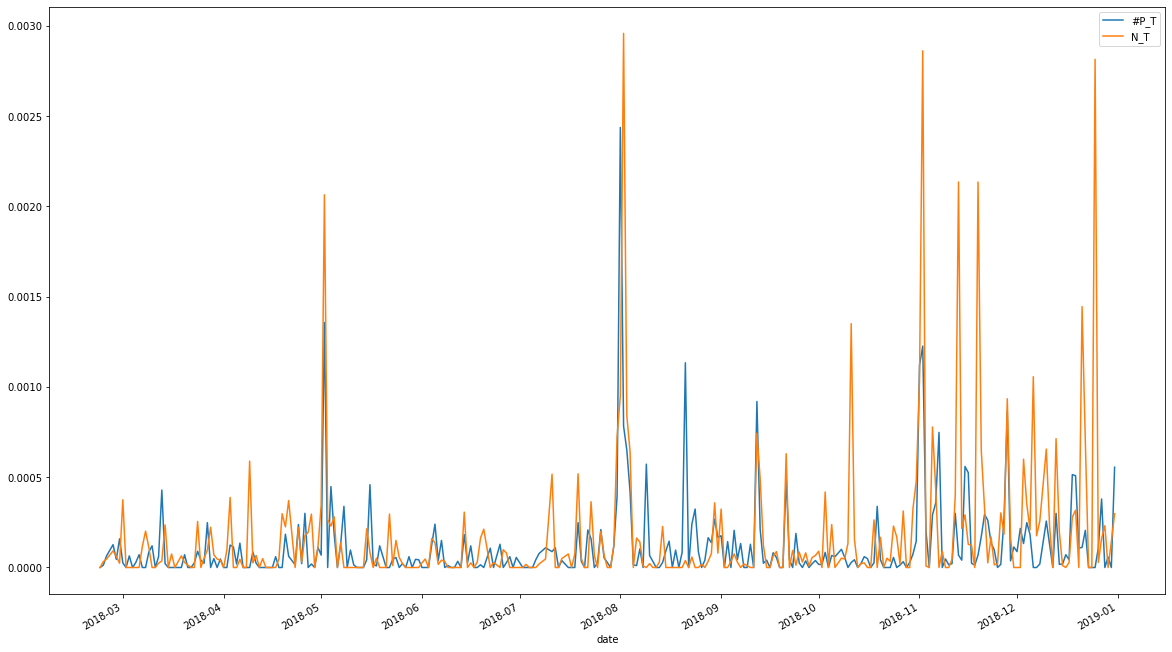

In [664]:
#cat.drop(columns = ['#V_T', '#Users', '#Tweets', '#Tweets_today']).plot(figsize = (15, 12))

cat[['#P_T', 'N_T']].plot(subplots = False, figsize = (20, 12))

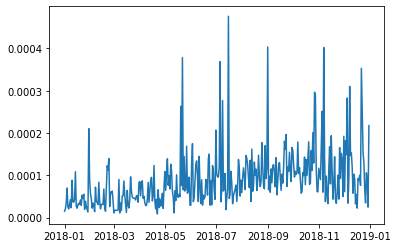

In [631]:
from matplotlib import pyplot as plt
plt.scatter
plt.plot(cat.index, cat['mean_likes'])
plt.show()

In [29]:
s_tweet = list(data['tweet'][:10])

In [30]:
print(s_tweet)

['$CTAS stock on the board today, but not as a swing play...  “This one is more in line with being a long term leader given its very strong Earnings Stability Factor (ESF) of 3.” @IBD_JNielsen   #IBDLive  https://t.co/xDHKfIofxg', '$CTAS -- its first-ever #spiffypop for @TMFStockAdvisor members -- congratulations to my bro, @TomGardnerFool and his team for a cool company and wonderful selection rewarding patience.', 'From the way we enthuse about moats, you’d think we were building medieval castles instead of portfolios. But you don’t want your investments to collapse under an onslaught of upstart barbarian hordes, do you? Didn’t think so.  $AMT $WM $CTAS  https://t.co/fm6vWpCtJ4', '🎉Congratulations on your 35 year listing anniversary @CintasCorp! $CTAS  https://t.co/GahJWCkpUd', 'We are moments away from ringing the Opening Bell with Nasdaq President @NelsonGriggs and @CintasCorp! ✨ Join us:  https://t.co/rtetWLMY0w $CTAS  https://t.co/ID5nreV7CD', 'There’s more than one way to skin a

In [31]:
for i in s_tweet:
    score = compute_score(prune_sentence(i))
    print(i, score)

$CTAS stock on the board today, but not as a swing play...  “This one is more in line with being a long term leader given its very strong Earnings Stability Factor (ESF) of 3.” @IBD_JNielsen   #IBDLive  https://t.co/xDHKfIofxg (15, 2, 0)
$CTAS -- its first-ever #spiffypop for @TMFStockAdvisor members -- congratulations to my bro, @TomGardnerFool and his team for a cool company and wonderful selection rewarding patience. (10, 1, 0)
From the way we enthuse about moats, you’d think we were building medieval castles instead of portfolios. But you don’t want your investments to collapse under an onslaught of upstart barbarian hordes, do you? Didn’t think so.  $AMT $WM $CTAS  https://t.co/fm6vWpCtJ4 (17, 0, 1)
🎉Congratulations on your 35 year listing anniversary @CintasCorp! $CTAS  https://t.co/GahJWCkpUd (4, 0, 0)
We are moments away from ringing the Opening Bell with Nasdaq President @NelsonGriggs and @CintasCorp! ✨ Join us:  https://t.co/rtetWLMY0w $CTAS  https://t.co/ID5nreV7CD (8, 0, 0)

In [588]:
mga = data[data['ticker'] == 'MSFT']

In [589]:
for i in mga['ticker']:
    print(i)
    break

MSFT


In [590]:
mga = mga[(mga['date'] > '2018-05-31') & (mga['date'] <'2018-06-20')]

In [591]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

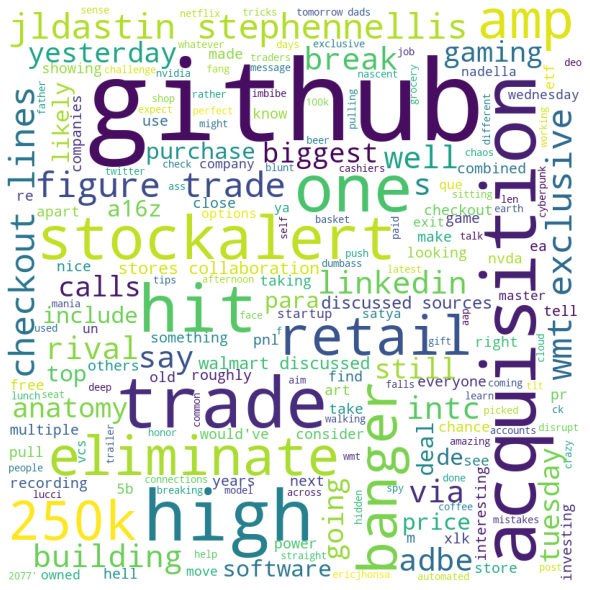

In [592]:
stopwords = set(STOPWORDS)

stopwords.update(['technology','ceo', 'day', 'buy','time','fb', 'goog', 'big', 'nflx', 'earnings', 'earning', 'stocks', 'new', 'cap', 'now', 'gt','msft', 'microsoft', 'billion','twtr','apple', 'amazon', 'tech', 'stock', 'today', 'year', 'aapl', 'market', 'will', 'googl', 'amzn'])

comment_words = ''

for val in mga['tweet']:
    val = remove_link(val)
    #print(val)
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [17]:
from transformers import DistilBertForSequenceClassification, pipeline, DistilBertTokenizer

model = DistilBertForSequenceClassification.from_pretrained('./pretrained_model')
tokenizer = DistilBertTokenizer.from_pretrained('./pretrained_model')

nlp = pipeline('sentiment-analysis', model, tokenizer=tokenizer)

nlp('Today is a bad day')

ImportError: cannot import name 'pipeline' from 'transformers' (/Users/kk3799/anaconda3/lib/python3.8/site-packages/transformers/__init__.py)

In [598]:
tt = {'ticker':[], '#tweets':[]}
f = []
"""#data = pd.DataFrame(columns = ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'ticker'])"""
for folder in os.listdir(tweet_folder):
    #folder = 'AMZN'
    if(folder[0] == '.') or folder in forbbidden:
        continue
    path = os.path.join(os.path.join(tweet_folder, folder), 'tweets.csv')
    cur = pd.read_csv(path)
    cur['ticker'] = folder
    #print(cur.columns)
    #break
    #tt['ticker'].append(folder)
    #tt['#tweets'].append(len(cur['username']))
    f.append(cur)
    #data.append(cur)
    #break
dfas = pd.concat(f, ignore_index=True)

In [600]:
dfas.to_csv('acc.csv', index = False)